In [2]:
import pymysql.cursors
connection = pymysql.connect(host='localhost',
                                     user='root',
                                     password='XvX-313VC',
                                     db='samlogs',
                                     charset='utf8mb4',
                                     cursorclass=pymysql.cursors.DictCursor,
                                     autocommit=True)

#try: 
with connection.cursor() as cursor:
    print(cursor.execute("SELECT distinct invalid_reason FROM samlogs.directedgraphs"))

project_path = "C:\work\graphs\Code_Clubs\\";
project_folder = "samia_morsecode_03102017";
parameters = ('76214924-cd7f-4271-a9f3-ed8fab168e68',);
#finally:
   # connection.close()

12


In [3]:
with connection.cursor() as cursor:
    cursor.execute("SELECT DISTINCT ID,timeCreated,path_label,valid,invalid_reason,behaviour,progressing_path_ID FROM samlogs.directedgraphs JOIN samlogs.nodes ON directedgraphs.stateID = nodes.stateID WHERE directedgraphs.projectID = %s", parameters);
    result = cursor.fetchall();
    print(len(result))

172


In [4]:
timeCreated = [ item['timeCreated'] for item in result ]
#x = states equally spaced out / spaced out proportionally by the time lapsed between them
print (len(timeCreated));

172


In [5]:
valid = [ item['valid'] for item in result ]
print (len(valid))

172


In [6]:
pathLabel = [ item['path_label'] for item in result ]
print (len(pathLabel))

172


In [8]:
with connection.cursor() as cursor_time:
    cursor_time.execute("SELECT DISTINCT timeCreated FROM samlogs.directedgraphs JOIN samlogs.nodes ON directedgraphs.stateID = nodes.stateID WHERE directedgraphs.projectID = %s", parameters);
    result_time = cursor_time.fetchall();
    print(len(result_time))

71


In [9]:
unique_timeCreated = [ item['timeCreated'] for item in result_time ]
unique_timeCreated.sort();
print (len(unique_timeCreated))

71


In [10]:
unique_directed_paths = set(pathLabel);
#for item in z:
 #   unique_directed_paths.update(item['path_label'])
    
print(unique_directed_paths)

{'->Keyboard->Player', '->Button->Text->MorseCode->Toggle->Player', '->Button->Toggle->Buzzer', '->Toggle->Text->RGBLED', '->Button->Text->MorseCode', '->Button->Toggle', '->Button->Toggle->Text->Buzzer', '->Button->Text->MorseCode->Toggle->Buzzer', '->Button->Toggle->Text', '->Button->Text->Toggle->Buzzer', '->Button->Text->MorseCode->Toggle', '->Text->RGBLED', '->Button->Text->Player', '->Button->Buzzer', '->Button->Text->MorseCode->Toggle->RGBLED', '->Button->MorseCode->Toggle->Text->RGBLED', '->Button->MorseCode->Toggle->RGBLED', '->Button->Toggle->RGBLED', '->Button->Toggle->Text->RGBLED', '->Toggle->RGBLED'}


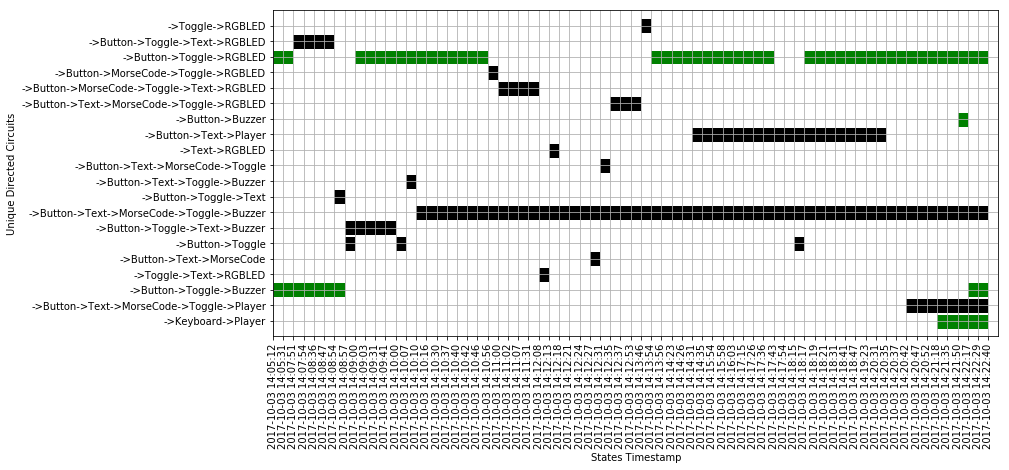

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(13,6))
plt.xticks(rotation=90)
ax.grid(True);

ax.set_ylim(0, len(unique_directed_paths)*10+10);
ax.set_yticks(np.arange(10, len(unique_directed_paths)*10+10, 10));
ax.set_yticklabels(unique_directed_paths);
ax.set_ylabel('Unique Directed Circuits');

ax.set_xlim(10, len(unique_timeCreated)*10+10);
ax.set_xticks(np.arange(10, len(unique_timeCreated)*10+10, 10));
ax.set_xticklabels(unique_timeCreated);
ax.set_xlabel('States Timestamp');

i=5;

for path in unique_directed_paths:
    path_markings_valid = [];
    path_markings_invalid = [];
    for item in result:
        if path == item['path_label']:
            if item['valid'] == 1:
                path_markings_valid.append(unique_timeCreated.index(item['timeCreated']) * 10);
            else:
                path_markings_invalid.append(unique_timeCreated.index(item['timeCreated']) * 10);
            
    xranges_valid = []; 
    for item in path_markings_valid:
        list = (item,10);
        xranges_valid.append(list);
    
    x_ranges_invalid = [];
    for item in path_markings_invalid:
        list = (item,10);
        x_ranges_invalid.append(list);
        
    yrange = (i,9);
    ax.broken_barh(xranges_valid,yrange,facecolors='green');
    #ax.broken_barh(x_ranges_invalid,yrange,facecolors='red'); #- fix/remove the red bits!!
    ax.broken_barh(x_ranges_invalid,yrange,facecolors='black');
   
    i = i+10;

image_file = project_path + project_folder + '\\' + 'Unique Directed Paths over Time' + '.png';
fig.savefig(image_file, bbox_inches = "tight");
plt.show();

In [11]:
progressingpathID = [ item['progressing_path_ID'] for item in result ]
print (len(progressingpathID))

172


In [12]:
unique_progressing_paths = set(progressingpathID);
#for item in z:
 #   unique_directed_paths.update(item['path_label'])
print(unique_progressing_paths)

unique_progressing_paths_list = [];
for path in unique_progressing_paths:
    unique_progressing_paths_list.append(path);
print(unique_progressing_paths_list);

{230, 140, 237, 78, 79, 218, 189, 159}
[230, 140, 237, 78, 79, 218, 189, 159]


In [13]:
state_unique_blocks = {};

for path in unique_progressing_paths:
    for item in result:
        if item['progressing_path_ID'] == path:
            blocks = item['path_label'][2:].split('->');
            unique_blocks = blocks;
            break;

    for item in result:
        blocks = [];
        if item['progressing_path_ID'] == path:
            blocks = item['path_label'][2:].split('->');
            j = 0;
            index = 0;
            for i in range(0, len(blocks)):
                exists = False;
                for j in range(index,len(unique_blocks)):
                    if blocks[i] == unique_blocks[j]:
                        index = j;
                        exists = True;
                        break;
                if exists == False:
                    unique_blocks.insert(index+1,blocks[i]);
                    
            state_unique_blocks[path] = unique_blocks;

print(state_unique_blocks);
               

{230: ['Keyboard', 'Player'], 140: ['Button', 'Text', 'MorseCode', 'Toggle', 'RGBLED'], 237: ['Button', 'Toggle', 'Buzzer'], 78: ['Button', 'Toggle', 'Text', 'MorseCode', 'Toggle', 'Buzzer'], 79: ['Button', 'MorseCode', 'Toggle', 'Text', 'RGBLED'], 218: ['Button', 'Text', 'MorseCode', 'Toggle', 'Player'], 189: ['Button', 'Toggle', 'RGBLED'], 159: ['Button', 'Text', 'Player']}


In [14]:
state_unique_blocks_paths = [];

for path in unique_progressing_paths:
    state_unique_blocks_path = str(path)
    for j in range(0, len(state_unique_blocks[path])):
        state_unique_blocks_path = state_unique_blocks_path + '->' + state_unique_blocks[path][j];
    state_unique_blocks_paths.append(state_unique_blocks_path);
    
print(state_unique_blocks_paths)

['230->Keyboard->Player', '140->Button->Text->MorseCode->Toggle->RGBLED', '237->Button->Toggle->Buzzer', '78->Button->Toggle->Text->MorseCode->Toggle->Buzzer', '79->Button->MorseCode->Toggle->Text->RGBLED', '218->Button->Text->MorseCode->Toggle->Player', '189->Button->Toggle->RGBLED', '159->Button->Text->Player']


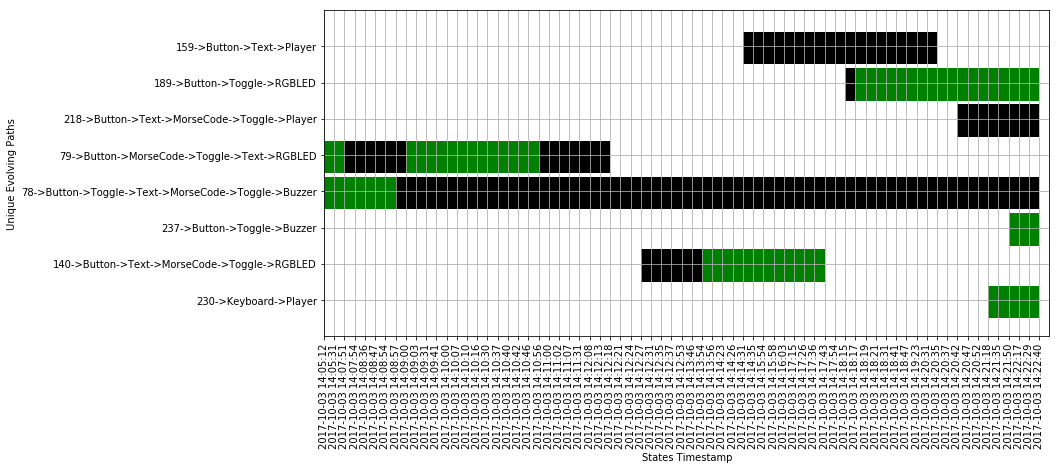

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(13,6))
plt.xticks(rotation=90)
ax.grid(True);

ax.set_ylim(0, len(unique_progressing_paths)*10+10);
ax.set_yticks(np.arange(10, len(unique_progressing_paths)*10+10, 10));
ax.set_yticklabels(state_unique_blocks_paths);
ax.set_ylabel('Unique Evolving Paths');

ax.set_xlim(10, len(unique_timeCreated)*10+10);
ax.set_xticks(np.arange(10, len(unique_timeCreated)*10+10, 10));
ax.set_xticklabels(unique_timeCreated);
ax.set_xlabel('States Timestamp');

i=5;

for path in unique_progressing_paths:
    path_markings_valid = [];
    path_markings_invalid = [];
    for item in result:
        if path == item['progressing_path_ID']:
            if item['valid'] == 1:
                path_markings_valid.append(unique_timeCreated.index(item['timeCreated']) * 10);
            else:
                path_markings_invalid.append(unique_timeCreated.index(item['timeCreated']) * 10);
            
    xranges_valid = []; 
    for item in path_markings_valid:
        list = (item,10);
        xranges_valid.append(list);
    
    x_ranges_invalid = [];
    for item in path_markings_invalid:
        list = (item,10);
        x_ranges_invalid.append(list);
        
    yrange = (i,9);
    ax.broken_barh(xranges_valid,yrange,facecolors='green');
    #ax.broken_barh(x_ranges_invalid,yrange,facecolors='red'); - fix/remove the red bits!!
    ax.broken_barh(x_ranges_invalid,yrange,facecolors='black');
   
    i = i+10;

image_file = project_path + project_folder + '\\' + 'Unique Evolving Paths over Time' + '.png';
fig.savefig(image_file, bbox_inches = "tight");
plt.show();


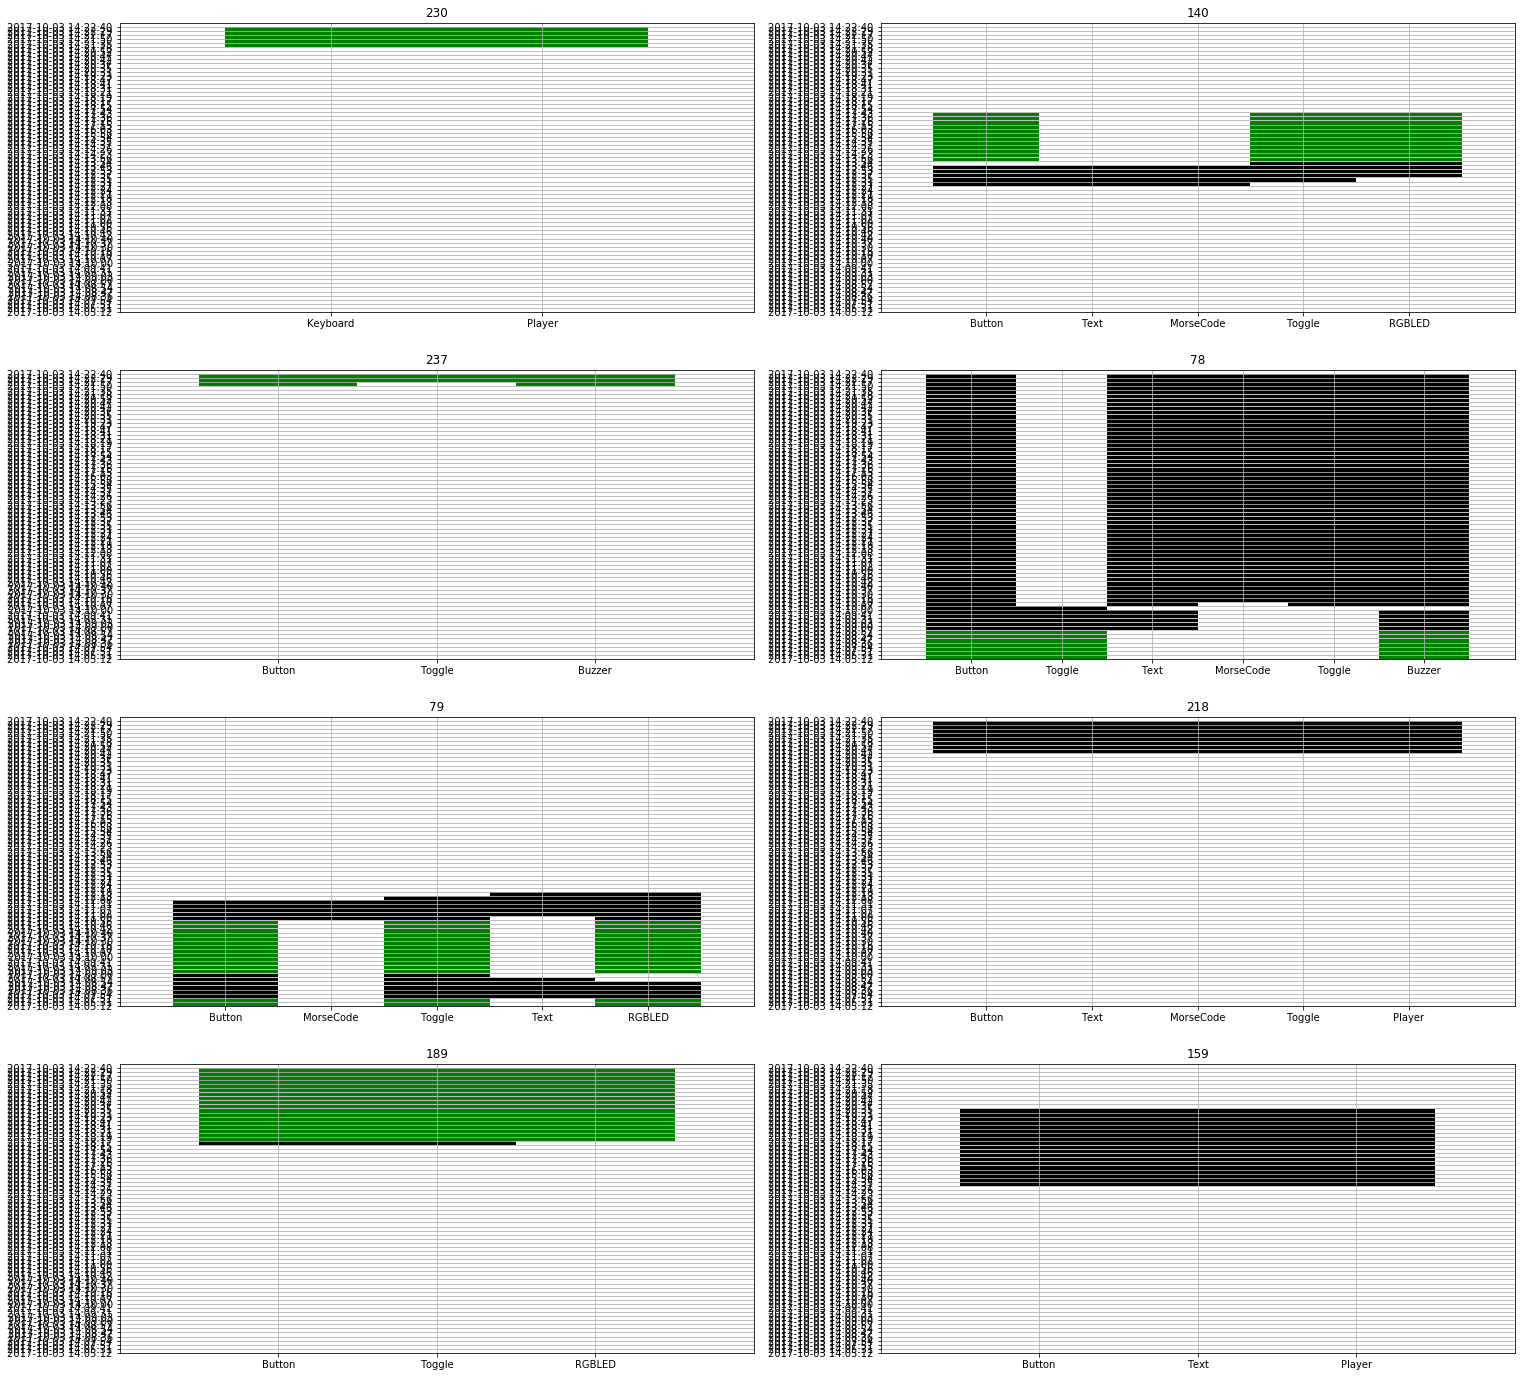

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig_id = 1;
rows = len(state_unique_blocks);
fig = plt.figure(figsize=(25, 50));

for pstateID, ublocks in state_unique_blocks.items():
    
    ax = fig.add_subplot(rows,2,fig_id);
    
    ax.set_title(pstateID);
    ax.grid(True);
    
    ax.set_xlim(0, len(ublocks) *10+10);
    ax.set_xticks(np.arange(10, len(ublocks) *10+10, 10));
    ax.set_xticklabels(ublocks);
    #ax.set_ylabel('Unique Blocks in Path');

    ax.set_ylim(10, len(unique_timeCreated)*10+10);
    ax.set_yticks(np.arange(10, len(unique_timeCreated)*10+10, 10));
    ax.set_yticklabels(unique_timeCreated);
    #ax.set_ylabel('States Timestamp');

    for item in result:
        path_markings_valid = [];
        path_markings_invalid = [];
       
        if pstateID == item['progressing_path_ID']:
            state_blocks = item['path_label'][2:].split('->');
            index = 0;
            for i in range(0, len(state_blocks)):
                for j in range(index,len(ublocks)):
                    if state_blocks[i] == ublocks[j]:
                        index = j;
                        break;       
                
                if item['valid'] == 1:
                    path_markings_valid.append(index *10 +5);
                else:
                    path_markings_invalid.append(index *10 +5);
            
            tc_index = unique_timeCreated.index(item['timeCreated']);
            yrange = (tc_index * 10,9);
                    
            x_ranges_valid = []; 
            for each in path_markings_valid:
                list = (each,10);
                x_ranges_valid.append(list);
    
            x_ranges_invalid = [];
            for each in path_markings_invalid:
                list = (each,10);
                x_ranges_invalid.append(list);

            ax.broken_barh(x_ranges_valid,yrange,facecolors='green');
            #ax.broken_barh(x_ranges_invalid,yrange,facecolors='red'); - fix/remove the red bits!!
            ax.broken_barh(x_ranges_invalid,yrange,facecolors='black');
        
    fig_id = fig_id +1;

    
image_file = project_path + project_folder + '\\' + 'Individual Progressing Paths over Time' + '.png';
fig.savefig(image_file, bbox_inches = "tight");
plt.show();
